In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
accts = pd.read_csv("ZayoHackathonData_Accounts.csv", index_col=0)
cpqs = pd.read_csv("ZayoHackathonData_CPQs.csv", index_col=0)
opps = pd.read_csv("ZayoHackathonData_Opportunities.csv", index_col=0)
#svcs = pd.read_csv("ZayoHackathonData_Services.csv", index_col=0)
#sts = pd.read_csv("ZayoHackathonData_Sites.csv", index_col=0)
bldgs = pd.read_csv("ZayoHackathonData_Buildings.csv")

In [3]:
#opps.columns
np.unique(opps['StageName'])

array(['1 - Working', '2 - Best Case', '3 - Committed', '4 - Closed',
       '5 - Accepted', 'Closed - Lost'], dtype=object)

In [4]:
# Add a new column corresponding to whether or not the opportunity is close to being closed
to_predict = opps[(opps["StageName"] == "1 - Working") | (opps['StageName'] ==" 2 - Best Case")]
opp = opps[(opps["StageName"] == "3 - Committed") | (opps['StageName'] == "4 - Closed") | (opps['StageName'] == "5 - Accepted") | (opps['StageName'] == "Closed - Lost")]

opp['IsCommitted'] = [row['StageName'] in ["3 - Committed", "4 - Closed", "5 - Accepted"] for i, row in opp.iterrows()]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
cpqs.columns

Index([u'Account ID', u'CreatedDate', u'Product Group', u' X36 MRC List ',
       u' X36 NRR List ', u' X36 NPV List ', u'Building ID', u'Market',
       u'Street Address', u'City', u'State', u'Postal Code',
       u'Network Proximity', u'On Zayo Network Status'],
      dtype='object')

In [6]:
to_predict = to_predict.merge(accts, left_on = to_predict.columns[1], right_on = accts.columns[0], how = 'left', suffixes = ['_opp', '_accts'])
opp = opp.merge(accts, left_on = opp.columns[1], right_on = accts.columns[0], how = 'left', suffixes = ['_opp', '_accts'])
print(opp.columns.difference(to_predict.columns))

Index([u'IsCommitted'], dtype='object')


In [7]:
to_predict = to_predict.merge(cpqs, left_on = to_predict.columns[1], right_on = cpqs.columns[0], how = 'left', suffixes = ['_opp', '_cpqs'])
opp = opp.merge(cpqs, left_on = opp.columns[1], right_on = cpqs.columns[0], how = 'left', suffixes = ['_opp', '_cpqs'])
print(opp.columns.difference(to_predict.columns))

Index([u'IsCommitted'], dtype='object')


In [8]:
to_predict = to_predict.merge(bldgs, left_on = to_predict.columns[10], right_on = bldgs.columns[0], how = 'left', suffixes = ['_opp', '_bldgs'])
opp = opp.merge(bldgs, left_on = opp.columns[10], right_on = bldgs.columns[0], how = 'left', suffixes = ['_opp', '_bldgs'])
print(opp.columns.difference(to_predict.columns))

Index([u'IsCommitted'], dtype='object')


In [9]:
to_predict.columns

Index([u'﻿Opportunity ID', u'Account ID', u'StageName', u'IsClosed', u'IsWon',
       u'CreatedDate_opp', u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Building ID_opp', u'Market_opp',
       u'Street Address_opp', u'City_opp', u'State_opp', u'Postal Code_opp',
       u'Network Proximity_opp', u'On Zayo Network Status_opp',
       u'Latitude_opp', u'Longitude_opp', u'Industry', u'Vertical',
       u' Total BRR ', u' AnnualRevenue ', u'NumberOfEmployees',
       u' DandB Revenue ', u'DandB Total Employees', u'CreatedDate_cpqs',
       u'Product Group_cpqs', u' X36 MRC List ', u' X36 NRR List ',
       u' X36 NPV List ', u'Building ID_cpqs', u'Market_cpqs',
       u'Street Address_cpqs', u'City_cpqs', u'State_cpqs',
       u'Postal Code_cpqs', u'Network Proximity_cpqs',
       u'On Zayo Network Status_cpqs', u'Building ID', u'Market',
       u'Street Address', u'City', u'State', u'Postal Code', u'Latitude_bldgs',
       u'Longitude_bldgs', u'On Zayo N

## Data Preprocessing

In [10]:
opp_filtered = opp.drop([opp.columns[0], opp.columns[1], opp.columns[2], opp.columns[3], opp.columns[4], 
                         opp.columns[5], opp.columns[10], opp.columns[12], opp.columns[18], opp.columns[19], 
                         opp.columns[28], opp.columns[33], opp.columns[35], opp.columns[41], opp.columns[43], 
                         opp.columns[47], opp.columns[48]], axis=1)
opp_filtered.columns

Index([u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Market_opp', u'City_opp', u'State_opp',
       u'Postal Code_opp', u'Network Proximity_opp',
       u'On Zayo Network Status_opp', u'IsCommitted', u'Industry', u'Vertical',
       u' Total BRR ', u' AnnualRevenue ', u'NumberOfEmployees',
       u' DandB Revenue ', u'DandB Total Employees', u'Product Group_cpqs',
       u' X36 MRC List ', u' X36 NRR List ', u' X36 NPV List ', u'Market_cpqs',
       u'City_cpqs', u'State_cpqs', u'Postal Code_cpqs',
       u'Network Proximity_cpqs', u'On Zayo Network Status_cpqs', u'Market',
       u'City', u'State', u'Postal Code', u'On Zayo Network Status',
       u'Net Classification', u'Type', u'Network Proximity',
       u' Estimated Build Cost '],
      dtype='object')

In [11]:
to_predict_filtered = to_predict.drop([to_predict.columns[0], to_predict.columns[1], to_predict.columns[2], 
                              to_predict.columns[3], to_predict.columns[4], to_predict.columns[5], 
                              to_predict.columns[10], to_predict.columns[12], to_predict.columns[18], 
                              to_predict.columns[19], to_predict.columns[27], to_predict.columns[32], 
                              to_predict.columns[34], to_predict.columns[40], to_predict.columns[42], 
                              to_predict.columns[46], to_predict.columns[47]], axis=1)
to_predict_filtered.columns

Index([u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Market_opp', u'City_opp', u'State_opp',
       u'Postal Code_opp', u'Network Proximity_opp',
       u'On Zayo Network Status_opp', u'Industry', u'Vertical', u' Total BRR ',
       u' AnnualRevenue ', u'NumberOfEmployees', u' DandB Revenue ',
       u'DandB Total Employees', u'Product Group_cpqs', u' X36 MRC List ',
       u' X36 NRR List ', u' X36 NPV List ', u'Market_cpqs', u'City_cpqs',
       u'State_cpqs', u'Postal Code_cpqs', u'Network Proximity_cpqs',
       u'On Zayo Network Status_cpqs', u'Market', u'City', u'State',
       u'Postal Code', u'On Zayo Network Status', u'Net Classification',
       u'Type', u'Network Proximity', u' Estimated Build Cost '],
      dtype='object')

In [12]:
print(len(to_predict_filtered.columns), len(opp_filtered.columns))

(36, 37)


In [13]:
features = opp_filtered.columns - [u'IsCommitted']
prediction = [u'IsCommitted']

opp_filtered[features].tail()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


,AnnualRevenue,DandB Revenue,Estimated Build Cost,Total BRR,X36 MRC List,X36 NPV List,X36 NRR List,City,City_cpqs,City_opp,...,Postal Code_opp,Product Group_cpqs,Product Group_opp,Service,State,State_cpqs,State_opp,Term in Months,Type,Vertical
723585,NaN,NaN,"$27,768.50",NaN,$576.25,"$13,889.20",$-,Carrollton,Carrollton,Carrollton,...,75007,Ethernet,Ethernet,NaN,TX,TX,TX,36.0,Neutral Data Center,NaN
723586,NaN,NaN,"$27,768.50",NaN,"$2,416.51","$20,340.23","$2,766.00",Carrollton,Englewood,Carrollton,...,75007,Wavelengths - Long Haul,Ethernet,NaN,TX,CO,TX,36.0,Neutral Data Center,NaN
723587,NaN,NaN,"$27,768.50",NaN,"$5,106.28","$44,056.87","$2,766.00",Carrollton,Denver,Carrollton,...,75007,Wavelengths - Metro,Ethernet,NaN,TX,CO,TX,36.0,Neutral Data Center,NaN
723588,NaN,NaN,"$27,768.50",NaN,"$5,106.28","$44,056.87","$2,766.00",Carrollton,Centennial,Carrollton,...,75007,Wavelengths - Metro,Ethernet,NaN,TX,CO,TX,36.0,Neutral Data Center,NaN
723589,NaN,NaN,"$219,671.50",NaN,"$1,664.05","$12,181.69",$922.00,Arvada,Arvada,Arvada,...,80004,Ethernet,Ethernet,NaN,CO,CO,CO,36.0,Private Data Center,NaN


In [14]:
# First let's convert any dollar amounts to floats
to_predict_filtered[[' AnnualRevenue ']] = to_predict_filtered[[' AnnualRevenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' DandB Revenue ']] = to_predict_filtered[[' DandB Revenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' Estimated Build Cost ']] = to_predict_filtered[[' Estimated Build Cost ']].replace('[\$,]','',regex=True).astype(float)
to_predict_filtered[[' Total BRR ']] = to_predict_filtered[[' Total BRR ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' X36 MRC List ']] = to_predict_filtered[[' X36 MRC List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' X36 NPV List ']] = to_predict_filtered[[' X36 NPV List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[[' X36 NRR List ']] = to_predict_filtered[[' X36 NRR List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
to_predict_filtered[features].tail()

opp_filtered[[' AnnualRevenue ']] = opp_filtered[[' AnnualRevenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' DandB Revenue ']] = opp_filtered[[' DandB Revenue ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' Estimated Build Cost ']] = opp_filtered[[' Estimated Build Cost ']].replace('[\$,]','',regex=True).astype(float)
opp_filtered[[' Total BRR ']] = opp_filtered[[' Total BRR ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' X36 MRC List ']] = opp_filtered[[' X36 MRC List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' X36 NPV List ']] = opp_filtered[[' X36 NPV List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)
opp_filtered[[' X36 NRR List ']] = opp_filtered[[' X36 NRR List ']].replace('[\$,]','',regex=True).replace('[\-]','0',regex=True).astype(float)

opp_filtered[features].tail()

,AnnualRevenue,DandB Revenue,Estimated Build Cost,Total BRR,X36 MRC List,X36 NPV List,X36 NRR List,City,City_cpqs,City_opp,...,Postal Code_opp,Product Group_cpqs,Product Group_opp,Service,State,State_cpqs,State_opp,Term in Months,Type,Vertical
723585,NaN,NaN,27768.5,NaN,576.25,13889.20,0.0,Carrollton,Carrollton,Carrollton,...,75007,Ethernet,Ethernet,NaN,TX,TX,TX,36.0,Neutral Data Center,NaN
723586,NaN,NaN,27768.5,NaN,2416.51,20340.23,2766.0,Carrollton,Englewood,Carrollton,...,75007,Wavelengths - Long Haul,Ethernet,NaN,TX,CO,TX,36.0,Neutral Data Center,NaN
723587,NaN,NaN,27768.5,NaN,5106.28,44056.87,2766.0,Carrollton,Denver,Carrollton,...,75007,Wavelengths - Metro,Ethernet,NaN,TX,CO,TX,36.0,Neutral Data Center,NaN
723588,NaN,NaN,27768.5,NaN,5106.28,44056.87,2766.0,Carrollton,Centennial,Carrollton,...,75007,Wavelengths - Metro,Ethernet,NaN,TX,CO,TX,36.0,Neutral Data Center,NaN
723589,NaN,NaN,219671.5,NaN,1664.05,12181.69,922.0,Arvada,Arvada,Arvada,...,80004,Ethernet,Ethernet,NaN,CO,CO,CO,36.0,Private Data Center,NaN


In [15]:
from sklearn import preprocessing

# Sklearn's decision trees do not like features which are strings. We need 
# to convert any features which are strings into numerical values. We'll use
# Sklearn's built in label encoding. We'll store these encoders for our 
# understanding later.

le = {}

for feature in features:
    #print feature
    if opp_filtered[feature].dtype == np.float64 or opp_filtered[feature].dtype == np.int64:
        opp_filtered[feature] = opp_filtered[feature].replace(np.nan, 0, regex=True)
        to_predict_filtered[feature] = to_predict_filtered[feature].replace(np.nan, 0, regex=True)
        continue
    print feature
    opp_filtered[feature] = opp_filtered[feature].replace(np.nan, u'NaN', regex=True)
    to_predict_filtered[feature] = to_predict_filtered[feature].replace(np.nan, u'NaN', regex=True)
    
    le[feature] = preprocessing.LabelEncoder()
    le[feature].fit(pd.concat([opp_filtered[feature], to_predict_filtered[feature]]))
    #print le[feature].classes_

    opp_filtered[feature] = [le[feature].transform([row])[0] for row in opp_filtered[feature]]
    to_predict_filtered[feature] = [le[feature].transform([row])[0] for row in to_predict_filtered[feature]] 

City
City_cpqs
City_opp
Industry
Market
Market_cpqs
Market_opp
Net Classification
On Zayo Network Status
On Zayo Network Status_cpqs
On Zayo Network Status_opp
Opportunity Type
Postal Code
Postal Code_cpqs
Product Group_cpqs
Product Group_opp
Service
State
State_cpqs
State_opp
Type
Vertical


In [16]:
opp_filtered.to_csv("opp_training_data.csv", sep =",")
opp_filtered.head()

,Term in Months,Service,Opportunity Type,Product Group_opp,Market_opp,City_opp,State_opp,Postal Code_opp,Network Proximity_opp,On Zayo Network Status_opp,...,On Zayo Network Status_cpqs,Market,City,State,Postal Code,On Zayo Network Status,Net Classification,Type,Network Proximity,Estimated Build Cost
0,12.0,0,5,3,0,8,1,30303,66.45,2,...,3,0,8,1,56,2,1,1,66.45,11993.5
1,12.0,0,5,3,0,8,1,30303,66.45,2,...,3,0,8,1,56,2,1,1,66.45,11993.5
2,12.0,0,5,3,0,8,1,30303,66.45,2,...,3,0,8,1,56,2,1,1,66.45,11993.5
3,12.0,0,5,3,0,8,1,30303,66.45,2,...,3,0,8,1,56,2,1,1,66.45,11993.5
4,12.0,0,5,3,0,8,1,30303,66.45,2,...,3,0,8,1,56,2,1,1,66.45,11993.5


In [17]:
to_predict_filtered.to_csv("opp_test_data.csv", sep =",")
to_predict_filtered.head()

,Term in Months,Service,Opportunity Type,Product Group_opp,Market_opp,City_opp,State_opp,Postal Code_opp,Network Proximity_opp,On Zayo Network Status_opp,...,On Zayo Network Status_cpqs,Market,City,State,Postal Code,On Zayo Network Status,Net Classification,Type,Network Proximity,Estimated Build Cost
0,0.0,0,5,3,0,8,1,30309,185.76,2,...,3,0,8,1,61,2,1,19,185.76,15572.8
1,0.0,0,5,3,0,8,1,30309,185.76,2,...,3,0,8,1,61,2,1,19,185.76,15572.8
2,0.0,0,5,3,0,8,1,30309,185.76,2,...,3,0,8,1,61,2,1,19,185.76,15572.8
3,0.0,0,5,3,0,8,1,30309,185.76,2,...,3,0,8,1,61,2,1,19,185.76,15572.8
4,0.0,0,5,3,0,8,1,30309,185.76,2,...,3,0,8,1,61,2,1,19,185.76,15572.8


In [18]:
import pickle

print(le.keys())

with open('label_encoding.p', 'wb') as handle:
    pickle.dump(le, handle)

['State_opp', 'City', 'State_cpqs', 'Service', 'Product Group_cpqs', 'On Zayo Network Status', 'On Zayo Network Status_opp', 'Type', 'Vertical', 'Market_opp', 'Market_cpqs', 'City_opp', 'City_cpqs', 'Industry', 'Postal Code', 'Postal Code_cpqs', 'Product Group_opp', 'State', 'On Zayo Network Status_cpqs', 'Opportunity Type', 'Net Classification', 'Market']


## Build a Random Forest

In [19]:
# Decision trees can be prone to overfitting. Let's use a
# random forest (a bunch of decision trees trained on 
# sub-samples of the data).

from sklearn import ensemble

clf = ensemble.RandomForestClassifier()
fraction = 4.0/5.0
shuffled = opp_filtered.sample(frac=1)

trainX = shuffled[features][:int(round(fraction*len(shuffled)))].values
trainY = shuffled[prediction][:int(round(fraction*len(shuffled)))].values

clf = clf.fit(trainX, trainY)

testX = shuffled[features][int(round(fraction*len(shuffled))):].values
testY = shuffled[prediction][int(round(fraction*len(shuffled))):].values

print(clf.score(testX, testY))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.981087356099


Feature ranking:
1.	feature 33	(0.214991, Term in Months)
2.	feature 20	(0.120111, On Zayo Network Status)
3.	feature 28	(0.111689, Product Group_opp)
4.	feature 16	(0.073625, Network Proximity)
5.	feature 22	(0.059480, On Zayo Network Status_opp)
6.	feature 18	(0.047910, Network Proximity_opp)
7.	feature 3	(0.045447, Total BRR)
8.	feature 2	(0.035057, Estimated Build Cost)
9.	feature 24	(0.034751, Postal Code)
10.	feature 9	(0.031798, City_opp)
11.	feature 6	(0.030938, X36 NRR List)
12.	feature 26	(0.029440, Postal Code_opp)
13.	feature 34	(0.029299, Type)
14.	feature 15	(0.022707, Net Classification)
15.	feature 7	(0.021952, City)
16.	feature 4	(0.016168, X36 MRC List)
17.	feature 5	(0.015476, X36 NPV List)
18.	feature 14	(0.010288, Market_opp)
19.	feature 27	(0.010023, Product Group_cpqs)
20.	feature 17	(0.009349, Network Proximity_cpqs)
21.	feature 25	(0.009022, Postal Code_cpqs)
22.	feature 8	(0.004961, City_cpqs)
23.	feature 32	(0.003420, State_opp)
24.	feature 30	(0.002729, Stat

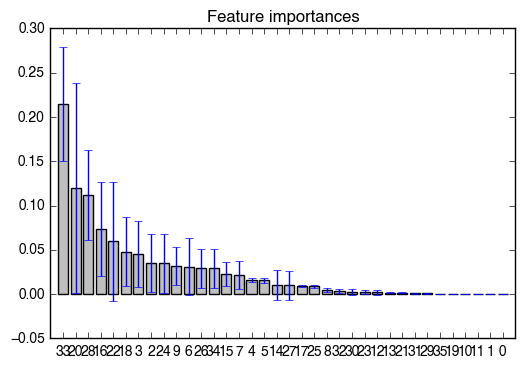

In [20]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(opp_filtered[features].shape[1]):
    print("%d.\tfeature %d\t(%f, %s)" % (f + 1, indices[f], importances[indices[f]], opp_filtered[features].columns[indices[f]].strip()))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(opp_filtered[features].shape[1]), importances[indices],
    color = '0.75', yerr=std[indices], align="center")
plt.xticks(range(opp_filtered[features].shape[1]), indices)
plt.xlim([-1, opp_filtered[features].shape[1]])
plt.show()

In [21]:
"""
from sklearn import tree

from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
"""

'\nfrom sklearn import tree\n\nfrom IPython.display import Image  \nimport pydotplus\ndot_data = tree.export_graphviz(clf, out_file=None,  \n                         filled=True, rounded=True,  \n                         special_characters=True)  \ngraph = pydotplus.graph_from_dot_data(dot_data)  \nImage(graph.create_png())\n'

## Predict on working account

In [22]:
to_predict_filtered.columns

Index([u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Market_opp', u'City_opp', u'State_opp',
       u'Postal Code_opp', u'Network Proximity_opp',
       u'On Zayo Network Status_opp', u'Industry', u'Vertical', u' Total BRR ',
       u' AnnualRevenue ', u'NumberOfEmployees', u' DandB Revenue ',
       u'DandB Total Employees', u'Product Group_cpqs', u' X36 MRC List ',
       u' X36 NRR List ', u' X36 NPV List ', u'Market_cpqs', u'City_cpqs',
       u'State_cpqs', u'Postal Code_cpqs', u'Network Proximity_cpqs',
       u'On Zayo Network Status_cpqs', u'Market', u'City', u'State',
       u'Postal Code', u'On Zayo Network Status', u'Net Classification',
       u'Type', u'Network Proximity', u' Estimated Build Cost '],
      dtype='object')

In [23]:
test_predictions = clf.predict_proba(to_predict_filtered[features].values)

In [24]:
clf.classes_

array([False,  True], dtype=bool)

In [29]:
len(test_predictions)

877203

In [30]:
to_predict['IsCommittedProbability'] = [pred[1] for pred in test_predictions]
to_predict.head()

,﻿Opportunity ID,Account ID,StageName,IsClosed,IsWon,CreatedDate_opp,Term in Months,Service,Opportunity Type,Product Group_opp,...,State,Postal Code,Latitude_bldgs,Longitude_bldgs,On Zayo Network Status,Net Classification,Type,Network Proximity,Estimated Build Cost,IsCommittedProbability
0,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.0
1,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.0
2,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.0
3,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.0
4,Opp-000004,Acct-000143,1 - Working,False,False,7/1/16,NaN,NaN,New Service,Ethernet,...,GA,30309,33.783427,-84.388557,On Zayo Network,On-Net,Neutral Data Center,185.76,"$15,572.80",0.1


In [28]:
print(len(to_predict), len(to_predict_filtered))

(877203, 877203)


In [32]:
to_predict.to_csv("opp_working_data.csv", sep =",")

In [37]:
to_predict_further_filtered = to_predict
to_predict_further_filtered.columns[2:(len(to_predict_further_filtered.columns)-1)]

Index([u'StageName', u'IsClosed', u'IsWon', u'CreatedDate_opp',
       u'Term in Months', u'Service', u'Opportunity Type',
       u'Product Group_opp', u'Building ID_opp', u'Market_opp',
       u'Street Address_opp', u'City_opp', u'State_opp', u'Postal Code_opp',
       u'Network Proximity_opp', u'On Zayo Network Status_opp',
       u'Latitude_opp', u'Longitude_opp', u'Industry', u'Vertical',
       u' Total BRR ', u' AnnualRevenue ', u'NumberOfEmployees',
       u' DandB Revenue ', u'DandB Total Employees', u'CreatedDate_cpqs',
       u'Product Group_cpqs', u' X36 MRC List ', u' X36 NRR List ',
       u' X36 NPV List ', u'Building ID_cpqs', u'Market_cpqs',
       u'Street Address_cpqs', u'City_cpqs', u'State_cpqs',
       u'Postal Code_cpqs', u'Network Proximity_cpqs',
       u'On Zayo Network Status_cpqs', u'Building ID', u'Market',
       u'Street Address', u'City', u'State', u'Postal Code', u'Latitude_bldgs',
       u'Longitude_bldgs', u'On Zayo Network Status', u'Net Classificatio

In [39]:
to_predict_further_filtered = to_predict_further_filtered.drop(to_predict_further_filtered.columns[2:(len(to_predict_further_filtered.columns)-1)], axis=1)
print(to_predict_further_filtered.columns)
to_predict_further_filtered.to_csv("random_forest/opp_working_data_filtered.csv", sep =",")

Index([u'﻿Opportunity ID', u'Account ID', u'IsCommittedProbability'], dtype='object')
